In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation

In [3]:
zuzycieCiepla_2019 = pd.read_excel("./Zużycie ciepła_2019.xlsx")
zuzycieCiezkiegoOlejuOpalowego_2019 = pd.read_excel("./Zużycie ciężkiego oleju opałowego_2019.xlsx")
zuzycieLekkiegoOlejuOpalowego_2019 = pd.read_excel("./Zużycie lekkiego oleju opałowego_2019.xlsx")
zuzycieEnergiiElektrycznej_2019 = pd.read_excel("./Zużycie energii elektrycznej_2019.xlsx")
zuzycieGazuCieklego_2019 = pd.read_excel("./Zużycie gazu ciekłego_2019.xlsx")
zuzycieGazuZiemnego_2019 = pd.read_excel("./Zużycie gazu ziemnego_2019.xlsx")
zuzycieWeglaKamiennego_2019 = pd.read_excel("./Zużycie węgla kamiennego_2019.xlsx")

wartosciCiepla_2019 = []
for i in range(1, 17):
    wartosciCiepla_2019.append(zuzycieCiepla_2019.iloc[0][i])

wartosciCiezkiegoOlejuOpalowego_2019 = []
for i in range(1, 17):
    wartosciCiezkiegoOlejuOpalowego_2019.append(zuzycieCiezkiegoOlejuOpalowego_2019.iloc[0][i])
    
wartosciLekkiegoOlejuOpalowego_2019 = []
for i in range(1, 17):
    wartosciLekkiegoOlejuOpalowego_2019.append(zuzycieLekkiegoOlejuOpalowego_2019.iloc[0][i])
    
wartosciEnergiiElektrycznej_2019 = []
for i in range(1, 17):
    wartosciEnergiiElektrycznej_2019.append(zuzycieEnergiiElektrycznej_2019.iloc[0][i])
    
wartosciGazuCieklego_2019 = []
for i in range(1, 17):
    wartosciGazuCieklego_2019.append(zuzycieGazuCieklego_2019.iloc[0][i])
    
wartosciGazuZiemnego_2019 = []
for i in range(1, 17):
    wartosciGazuZiemnego_2019.append(zuzycieGazuZiemnego_2019.iloc[0][i])
    
wartosciWeglaKamiennego_2019 = []
for i in range(1, 17):
    wartosciWeglaKamiennego_2019.append(zuzycieWeglaKamiennego_2019.iloc[0][i])
    
odwroconyDataFrame = zuzycieCiepla_2019.transpose()

wojewodztwa = []
for i in range(1,17):
    wojewodztwa.append(odwroconyDataFrame.index[i])
    
df_2019 = {'Województwa' : wojewodztwa,
                'Zużycie ciepła' : wartosciCiepla_2019, 
                'Zużycie ciężkiego oleju opałowego' : wartosciCiezkiegoOlejuOpalowego_2019,
                'Zużycie lekkiego oleju opałowego' : wartosciLekkiegoOlejuOpalowego_2019,
                'Zużycie energii elektrycznej' : wartosciEnergiiElektrycznej_2019,
                'Zużycie gazu ciekłego' : wartosciGazuCieklego_2019,
                'Zużycie gazu ziemnego' : wartosciGazuZiemnego_2019,
                'Zużycie węgla kamiennego' : wartosciWeglaKamiennego_2019}

df = pd.DataFrame(df_2019, index = None)
df = df[::-1]

df

Województwa  Zużycie ciepła  Zużycie ciężkiego oleju opałowego  \
15   zachodniopomorskie           21460                                  5   
14        wielkopolskie           30360                                  8   
13  warmińsko-mazurskie           11884                                  0   
12       świętokrzyskie            6848                                  7   
11              śląskie           39841                                 30   
10            pomorskie           35686                                 39   
9             podlaskie           11114                                  4   
8          podkarpackie           12015                                  0   
7              opolskie           15469                                 10   
6           mazowieckie          102880                                641   
5           małopolskie           33156                                  8   
4               łódzkie           18628                                 11   
3              lubuskie           10958                                  0   
2             lubelskie           27376                                  4   
1    kujawsko-pomorskie           43192                                  2   
0          dolnośląskie           23456                                 13   

    Zużycie lekkiego oleju opałowego  Zużycie energii elektrycznej  \
15                                23                          6019   
14                                54                         12799   
13                                24                          3961   
12                                16                          5124   
11                                54                         25967   
10                                38                          8066   
9                                 21                          3225   
8                                 14                          5522   
7                                 32                          5552   
6                                167                         25348   
5                                 28                         13338   
4                                 43                         13361   
3                                 10                          3940   
2                                 28                          6050   
1                                 39                          8397   
0                                 37                         14306   

    Zużycie gazu ciekłego  Zużycie gazu ziemnego  Zużycie węgla kamiennego  
15                     30                  27574                      2481  
14                     73                  46073                      2221  
13                     43                   8710                       891  
12                     31                  15225                      4278  
11                     69                  65794                     16460  
10                     52                  44170                      1963  
9                      44                   6443                       696  
8                      18                  37292                      1129  
7                      23                  23063                     10164  
6                     233                 171882                     14005  
5                      44                  53130                      4491  
4                      63                  21503                      2117  
3                      20                  33980                       261  
2                      52                  61627                      1966  
1                      52                  34926                      2424  
0                      45                  40151                      2755

MovieWriter ffmpeg unavailable; using Pillow instead.


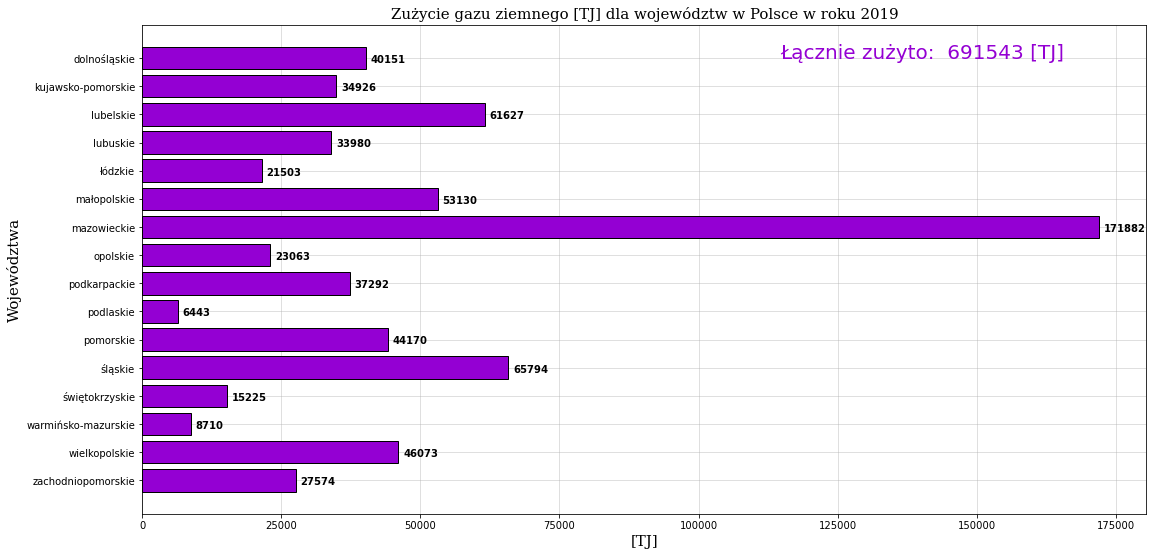

In [7]:
fig = plt.figure(figsize = (18,9))
tytul = {'family':'serif','color':'black','size':15}

def animuj(i):
    if (i == 0):
        plt.clf()
        plt.grid(alpha=0.5)
        plt.ylabel('Województwa', fontdict=tytul)
        plt.xlabel('[TJ]', fontdict=tytul)
        plot1 = plt.barh(wojewodztwa[::-1],wartosciCiepla_2019[::-1], color = 'b', zorder = 2,  edgecolor='k')
        for i, v in enumerate(df['Zużycie ciepła']):
            plt.text(v + max(df['Zużycie ciepła'])*0.005, i-0.15 , str(v),fontweight = 'bold',color = 'black')
        plt.annotate("Łącznie zużyto: " + ' ' + str(sum(df['Zużycie ciepła'])) + ' [TJ]', 
             xy = (max(df['Zużycie ciepła'])/1.5, 15), size = 20, color = 'blue')
        plt.title('Zużycie ciepła [TJ] dla województw w Polsce w roku 2019', fontdict = tytul)
        return plot1
    if (i == 1):
        plt.clf()
        plt.grid(alpha=0.5)
        plt.ylabel('Województwa', fontdict=tytul)
        plt.xlabel('[tys. ton]', fontdict=tytul)
        plot2 = plt.barh(wojewodztwa[::-1],wartosciCiezkiegoOlejuOpalowego_2019[::-1], color = 'g', zorder = 2,  edgecolor='k')
        for i, v in enumerate(df['Zużycie ciężkiego oleju opałowego']):
            plt.text(v + max(df['Zużycie ciężkiego oleju opałowego'])*0.005, i-0.15 , str(v),fontweight = 'bold',color= 'black')
        plt.annotate("Łącznie zużyto: " + ' ' + str(sum(df['Zużycie ciężkiego oleju opałowego'])) + ' [tys. ton]', 
             xy = (max(df['Zużycie ciężkiego oleju opałowego'])/1.5, 15), size = 20, color = 'g')
        plt.title('Zużycie ciężkiego oleju opałowego [tys. ton] dla województw w Polsce w roku 2019',fontdict = tytul)
        return plot2
    if (i == 2):
        plt.clf()
        plt.grid(alpha=0.5)
        plt.ylabel('Województwa', fontdict=tytul)
        plt.xlabel('[tys. ton]', fontdict=tytul)
        plot3 = plt.barh(wojewodztwa[::-1],wartosciLekkiegoOlejuOpalowego_2019[::-1], color = 'r', zorder = 2,  edgecolor='k')
        for i, v in enumerate(df['Zużycie lekkiego oleju opałowego']):
            plt.text(v + max(df['Zużycie lekkiego oleju opałowego'])*0.005, i-0.15 , str(v),fontweight = 'bold',color = 'black')
        plt.annotate("Łącznie zużyto: " + ' ' + str(sum(df['Zużycie lekkiego oleju opałowego'])) + ' [tys. ton]', 
             xy = (max(df['Zużycie lekkiego oleju opałowego'])/1.5, 15), size = 20, color = 'r')
        plt.title('Zużycie lekkiego oleju opałowego [tys. ton] dla województw w Polsce w roku 2019',fontdict = tytul)
        return plot3
    if (i == 3):
        plt.clf()
        plt.grid(alpha=0.5)
        plt.ylabel('Województwa', fontdict=tytul)
        plt.xlabel('[GWh]', fontdict=tytul)
        plot4 = plt.barh(wojewodztwa[::-1],wartosciEnergiiElektrycznej_2019[::-1], color = 'orange', zorder = 2,  edgecolor='k')
        for i, v in enumerate(df['Zużycie energii elektrycznej']):
            plt.text(v + max(df['Zużycie energii elektrycznej'])*0.005, i-0.15 , str(v),fontweight = 'bold',color = 'black')
        plt.annotate("Łącznie zużyto: " + ' ' + str(sum(df['Zużycie energii elektrycznej'])) + ' [GWh]', 
             xy = (max(df['Zużycie energii elektrycznej'])/1.5, 15), size = 20, color = 'orange')
        plt.title('Zużycie energii elektrycznej [GWh] dla województw w Polsce w roku 2019',fontdict = tytul)
        return plot4
    if (i == 4):
        plt.clf()
        plt.grid(alpha=0.5)
        plt.ylabel('Województwa', fontdict=tytul)
        plt.xlabel('[tys. ton]', fontdict=tytul)
        plot5 = plt.barh(wojewodztwa[::-1],wartosciGazuCieklego_2019[::-1], color = 'silver', zorder = 2,  edgecolor='k')
        for i, v in enumerate(df['Zużycie gazu ciekłego']):
            plt.text(v + max(df['Zużycie gazu ciekłego'])*0.005, i-0.15 , str(v),fontweight = 'bold',color = 'black')
        plt.annotate("Łącznie zużyto: " + ' ' + str(sum(df['Zużycie gazu ciekłego'])) + ' [tys. ton]', 
             xy = (max(df['Zużycie gazu ciekłego'])/1.5, 15), size = 20, color = 'silver')
        plt.title('Zużycie gazu ciekłego [tys. ton] dla województw w Polsce w roku 2019',fontdict = tytul)
        return plot5
    if (i == 5):
        plt.clf()
        plt.grid(alpha=0.5)
        plt.ylabel('Województwa', fontdict=tytul)
        plt.xlabel('[TJ]', fontdict=tytul)
        plot6 = plt.barh(wojewodztwa[::-1],wartosciGazuZiemnego_2019[::-1], color = 'darkviolet', zorder = 2,  edgecolor='k')
        for i, v in enumerate(df['Zużycie gazu ziemnego']):
            plt.text(v + max(df['Zużycie gazu ziemnego'])*0.005, i-0.15 , str(v),fontweight = 'bold',color = 'black')
        plt.annotate("Łącznie zużyto: " + ' ' + str(sum(df['Zużycie gazu ziemnego'])) + ' [TJ]', 
             xy = (max(df['Zużycie gazu ziemnego'])/1.5, 15), size = 20, color = 'darkviolet')
        plt.title('Zużycie gazu ziemnego [TJ] dla województw w Polsce w roku 2019',fontdict = tytul)
        return plot6
    if (i == 6):
        plt.clf()
        plt.grid(alpha=0.5)
        plt.ylabel('Województwa', fontdict=tytul)
        plt.xlabel('[tys. ton]', fontdict=tytul)
        plot7 = plt.barh(wojewodztwa[::-1],wartosciWeglaKamiennego_2019[::-1], color = 'brown', zorder = 2,  edgecolor='k')
        for i, v in enumerate(df['Zużycie węgla kamiennego']):
            plt.text(v + max(df['Zużycie węgla kamiennego'])*0.005, i-0.15 , str(v),fontweight = 'bold',color = 'black')
        plt.annotate("Łącznie zużyto: " + ' ' + str(sum(df['Zużycie węgla kamiennego'])) + ' [tys. ton]', 
             xy = (max(df['Zużycie węgla kamiennego'])/1.5, 15), size = 20, color = 'brown')
        plt.title('Zużycie węgla kamiennego [tys. ton] dla województw w Polsce w roku 2019',fontdict = tytul)
        return plot7
    
    
    
anim = FuncAnimation(fig, animuj, frames=6, interval=10000)
anim.save('Zużycie paliw w roku 2019.gif',dpi = 250)